Load Public Health England (PHE) datasets for Clinical Commissioning Groups (CCGs)

In [2]:
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf

In [3]:
#load datasets
dir_path='//Users/rony/Dropbox/2. projects/AMR/datasets/Fingertips(PHE)/'
indicators=pd.read_csv(dir_path+'CCGs.csv',low_memory=False)

In [4]:
#Select monthly data (dates=month-date, exclude quaterly data)
ind_monthly=indicators.loc[indicators['Time period'].str.contains('-')]

In [5]:
#Select monthly data (dates=month-date, exclude quaterly data)
#Datetime indexing
new_datetime_index=pd.to_datetime(ind_monthly['Time period'], format='%b-%y')
ind_monthly=ind_monthly.set_index(new_datetime_index)

In [6]:
#Select ccg from monthly data (dates=month-date, exclude quaterly data)
ind_monthly_ccgs=ind_monthly.loc[ind_monthly['Area Name'].str.contains('CCG')]

In [7]:
#Strip GCC names
temp_series=ind_monthly_ccgs['Area Name'].str.rstrip('CCG')
temp_series1=temp_series.str.lstrip('NHS')
temp_series2=temp_series1.str.strip()
ind_monthly_ccgs['Area Name']=temp_series2
ind_monthly_ccgs.rename(columns = {'Area Name':'CCG'}, inplace = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [8]:
#load metadata
dir_path='//Users/rony/Dropbox/2. projects/AMR/datasets/Fingertips(PHE)/metadata/'
indicators_md=pd.read_csv(dir_path+'AMRlocalindicators.metadata.csv',low_memory=False)
#index by indicators
indicators_md=indicators_md.set_index('Indicator ID')

In [9]:
indicator=92377

In [10]:
all_ccgs=pd.DataFrame() #to store indicator data for all ccgs
ccgs_list=ind_monthly_ccgs['CCG'].unique() #list of ccg names 

In [11]:
for index, value in enumerate (ccgs_list):
    indicator_ccg=ind_monthly_ccgs[(ind_monthly_ccgs['CCG']==value) &
                             (ind_monthly_ccgs['Indicator ID']==indicator)]
    indicator_ccg_values=indicator_ccg.loc[:,'Value']
    all_ccgs [value]=indicator_ccg_values

In [12]:
# descriptive_all contains descriptive statistics for indicator=92377 for all trusts
descriptive_all=pd.DataFrame(all_ccgs.describe())

In [13]:
descriptive_all=descriptive_all.transpose()
del descriptive_all['count']

In [14]:
descriptive_all['diff.']=descriptive_all['max']-descriptive_all['min']
descriptive_all['%diff.']=round(100*(descriptive_all['diff.']/descriptive_all['min']),1)
descriptive_all.head(10)

,mean,std,min,25%,50%,75%,max,diff.,%diff.
"Airedale, Wharfdale And Craven",1.079704,0.048490,1.020644,1.037459,1.059503,1.132023,1.151659,0.131015,12.8
Ashford,1.216391,0.056074,1.125785,1.176876,1.206478,1.268875,1.294971,0.169185,15.0
Aylesbury Vale,1.112555,0.051465,1.039119,1.072720,1.096989,1.167357,1.187016,0.147898,14.2
Barking And Dagenham,1.107431,0.088742,0.989743,1.036639,1.063700,1.207780,1.241309,0.251567,25.4
Barnet,0.912609,0.057420,0.830419,0.866130,0.895956,0.972145,0.994841,0.164421,19.8
Barnsley,1.211808,0.073694,1.123455,1.146808,1.177746,1.296465,1.318954,0.195499,17.4
Basildon And Brentwood,1.203856,0.026622,1.150493,1.188093,1.206013,1.226945,1.243611,0.093117,8.1
Bassetlaw,1.168818,0.039271,1.093275,1.140346,1.164946,1.201466,1.230074,0.136798,12.5
Bath And North East Somerset,0.940360,0.060609,0.855116,0.876782,0.942098,1.000559,1.030198,0.175082,20.5
Bedfordshire,1.107061,0.026846,1.063077,1.088764,1.099704,1.130892,1.147970,0.084893,8.0


In [15]:
#sort by difference values
descriptive_all=descriptive_all.sort_values(by=['%diff.'],ascending=False)

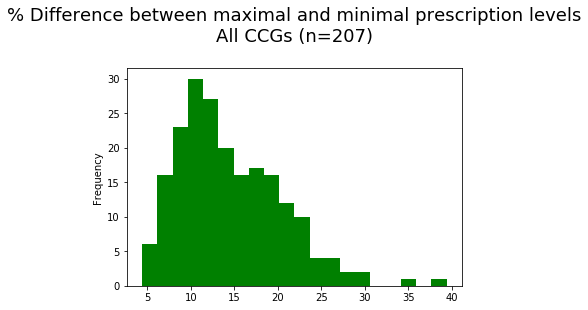

In [16]:
kx=descriptive_all['%diff.'].plot(kind='hist',bins=20, color=['green'])
kx.set_title('% Difference between maximal and minimal prescription levels\nAll CCGs (n=207)\n', fontsize=18)
plt.show()

Finding: The typical difference between minimal and maximal levels of perscription is aruond 10%

In [17]:
#using Plotly
descriptive_all['%diff.'].iplot(kind='histogram', filename='%diff_histogram')

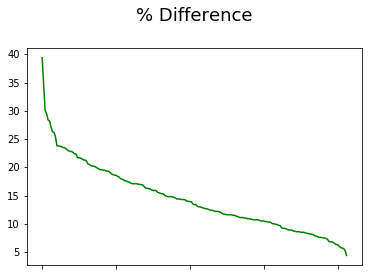

In [18]:
kx=descriptive_all['%diff.'].plot(color=['green'])
kx.set_title('% Difference\n', fontsize=18)
plt.show()

In [19]:
#Extended chart (Plotly)
data = [
    go.Scatter(
        x=descriptive_all.index, 
        y=descriptive_all['%diff.'],
        mode = 'lines+markers',
        line = dict(
        color = ('rgb(40, 140, 60)'),
        width = 2)
    )
]
py.iplot(data, filename='%diff_ccgs')

Finding: Some trusts however, showed much higher levels of difference, between 25-40%

Output

In [20]:
descriptive_all.to_csv('diff_2014_2017.csv')

Are these high differences the result of improvement? 
That is, is there a historical trajectory in these trusts from high to low presecription levels?
Test: 1 visually, isolate ccgs with difference between 25-40% and examine them with line plots. 

In [20]:
diff_class=[]
diff_list=descriptive_all['%diff.'].values
for index, value in enumerate (diff_list):
    if value >=25 :
        diff_class.append ('25-40%')
    elif value >=10 and value <25:
        diff_class.append ('10-24.9%')
    else:
        diff_class.append ('Less than 10%')
descriptive_all['diff_class']=diff_class #column diff_class contains classification of ccgs by %diff.|

In [22]:
#export descriptive table with area codes for geospatial mapping
descriptive_all['Area Code']=ind_monthly_ccgs['Area Code'].unique()
descriptive_all.to_excel('stats_diff.xlsx')

In [ ]:
Reduction levels vs. prescription levels

In [24]:
data = [
    go.Scatter(
        x=descriptive_all[descriptive_all['diff_class']==i]['mean'],
        y=descriptive_all[descriptive_all['diff_class']==i]['%diff.'],
        mode = 'markers',
        opacity=0.7,
        marker={
                'size': 15,
                'line': {'width': 0.5, 'color': 'white'}
                    },
                name=i
                ) for i in descriptive_all.diff_class.unique()
            ]

layout= go.Layout(
    title= 'Reduction (%) by prescricption levels',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Prescription (mean, STAR-PU)',
    ),
    yaxis=dict(
        title= 'Reduction (%)',
       
    ),
    showlegend= False
)

fig= go.Figure(data=data, layout=layout)
py.iplot(fig)

In [25]:
diff_df=descriptive_all[(descriptive_all['%diff.']<=40) & (descriptive_all['%diff.']>=25)]
#collect names of ccgs with min-max diff=25-40% to a list
ccgs_diff=diff_df.index
diff_ccgs=pd.DataFrame()

In [26]:
#collect time series for ccgs to a new dataframe (diff_ccgs)
for index, value in enumerate (ccgs_diff):
    indicator_ccg=ind_monthly_ccgs[(ind_monthly_ccgs['CCG']==value) &
                             (ind_monthly_ccgs['Indicator ID']==indicator)]
    indicator_ccg_values=indicator_ccg.loc[:,'Value']
    diff_ccgs [value]=indicator_ccg_values

Rounding before charting

In [27]:
diff_ccgs=round (diff_ccgs,2)
diff_ccgs.head(10)

,Wokingham,Southend,Corby,Ealing,Enfield,Greenwich,Southwark,Waltham Forest,Vale Royal,Barking And Dagenham
Time period,,,,,,,,,,
2014-07-01,1.23,1.53,1.30,1.05,1.14,1.15,0.93,1.12,1.24,1.21
2014-08-01,1.23,1.52,1.30,1.04,1.13,1.15,0.93,1.12,1.24,1.21
2014-09-01,1.23,1.52,1.23,1.05,1.13,1.14,0.92,1.11,1.24,1.21
2014-10-01,1.23,1.51,1.26,1.04,1.12,1.14,0.92,1.11,1.24,1.22
2014-11-01,1.23,1.50,1.25,1.04,1.12,1.13,0.91,1.10,1.23,1.23
2014-12-01,1.24,1.50,1.18,1.06,1.12,1.13,0.92,1.11,1.24,1.24
2015-01-01,1.26,1.49,1.22,1.06,1.10,1.13,0.92,1.10,1.24,1.24
2015-02-01,1.26,1.48,1.20,1.06,1.09,1.13,0.92,1.09,1.25,1.23
2015-03-01,1.25,1.47,1.13,1.06,1.08,1.12,0.91,1.08,1.25,1.23


In [48]:
diff_ccgs.to_csv('diff_lead_ccgs.csv')

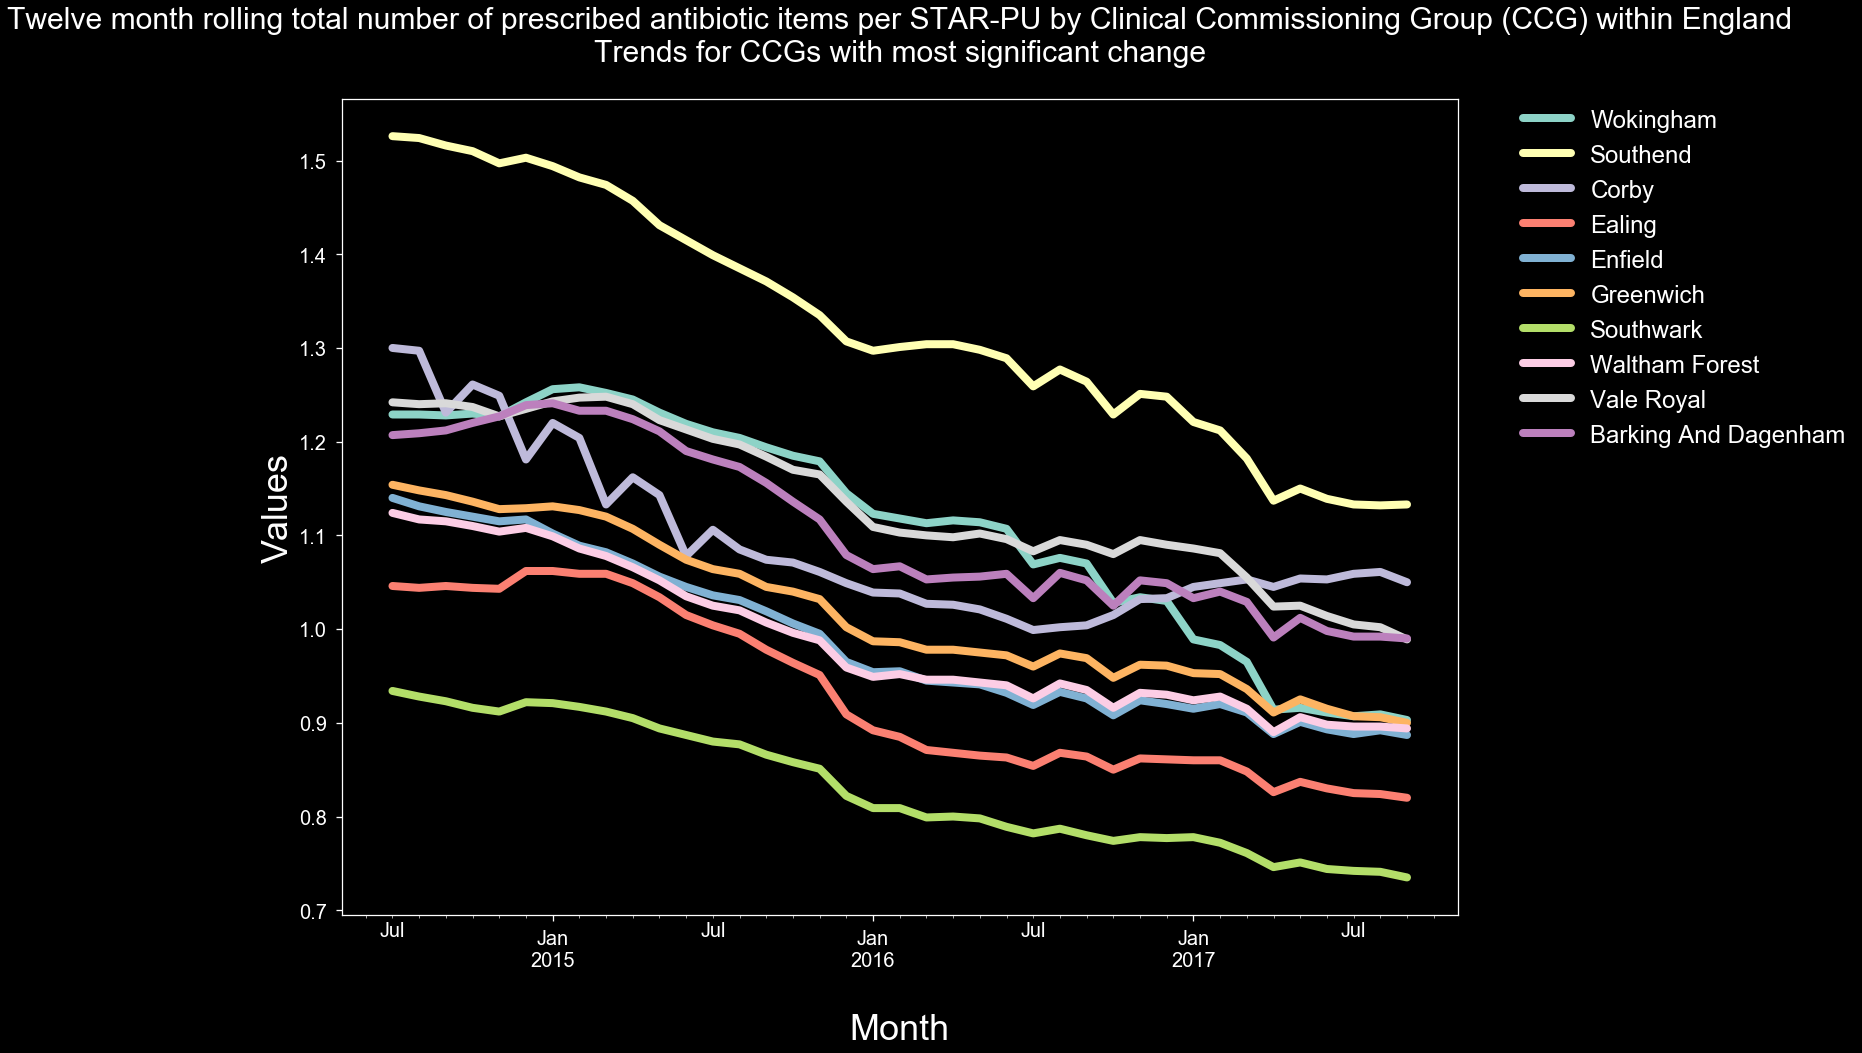

In [41]:
#plot time series

plt.style.use('dark_background')
with sns.color_palette("Set3", 10):
    ax=diff_ccgs.plot(figsize=(20,15), fontsize=20, linewidth=8)
ax.set_title(indicators_md.loc[indicator,'Indicator full name']+'\nTrends for CCGs with most significant change\n', fontsize=30)
ax.set_xlabel('\nMonth', fontsize=36)
ax.set_ylabel('Values', fontsize=36)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=24, borderaxespad=0.)
plt.show()

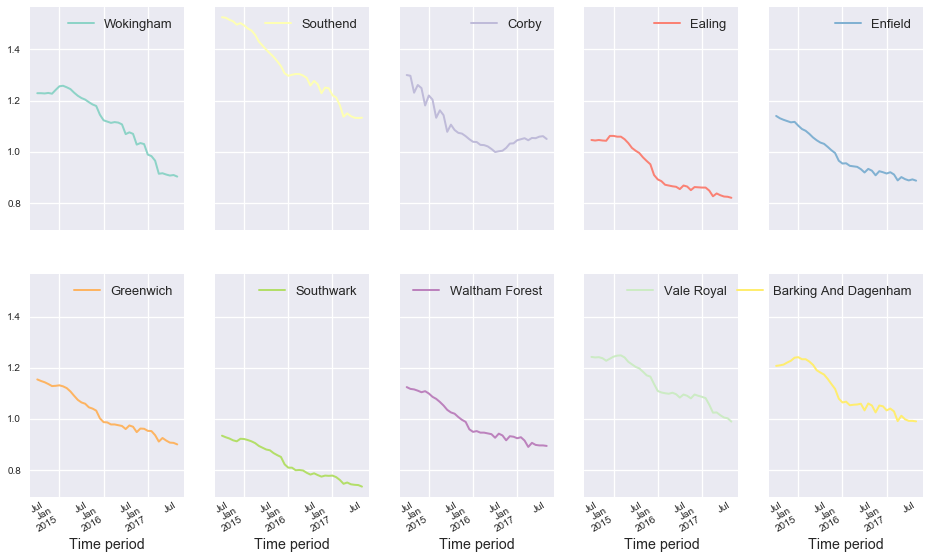

In [42]:
with sns.axes_style("darkgrid"):
    diff_ccgs.plot(subplots=True,linewidth=2,layout=(2, 5),figsize=(16, 10),fontsize=10,sharex=True,sharey=True)
plt.show()

The chart shows that min-max for the ccgs examined reflected an improvment with a gradual decline in levels of Ab prescribing

In [43]:
py.iplot([{
    'x': diff_ccgs.index,
    'y': diff_ccgs[col],
    'name': col}  for col in diff_ccgs.columns], filename='ccgs_ts')